**Importamos las librerías necesarias:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Cargamos nuestra base de datos. Se transforma la variable 'Fecha' a datetime para evitar problemas de visualización:**

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/cpizarrov/proyecto_final/main/covid_global_02.csv")
df['fecha'] = pd.to_datetime(df['fecha'])

Supongamos alguna institución, como el Ministerio de Salud, nos haya solicitado analizar las tendencias mundiales del coronavirus, esto con el fin de comparar las diferentes políticas sanitarias que los países adoptaron durante los años 2019 y 2023 y, así, evaluar la adopción de posibles medidas a nivel nacional. Adicionalmente, se nos ha solicitado levantar un tablero de visualización interactivo de estos datos para facilitar el acceso a dicha información.

Es así como podemos comenzar nuestro análisis con una primera vista de los países más afectados, ya sea por volumen de casos confirmados y por volumen de muertes: 

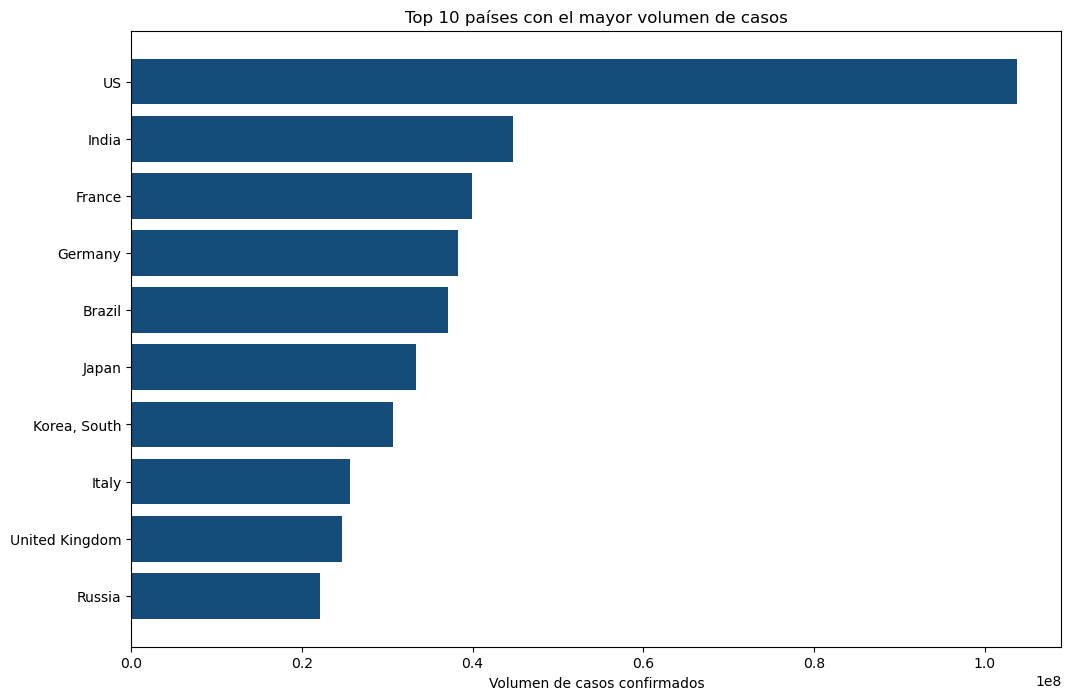

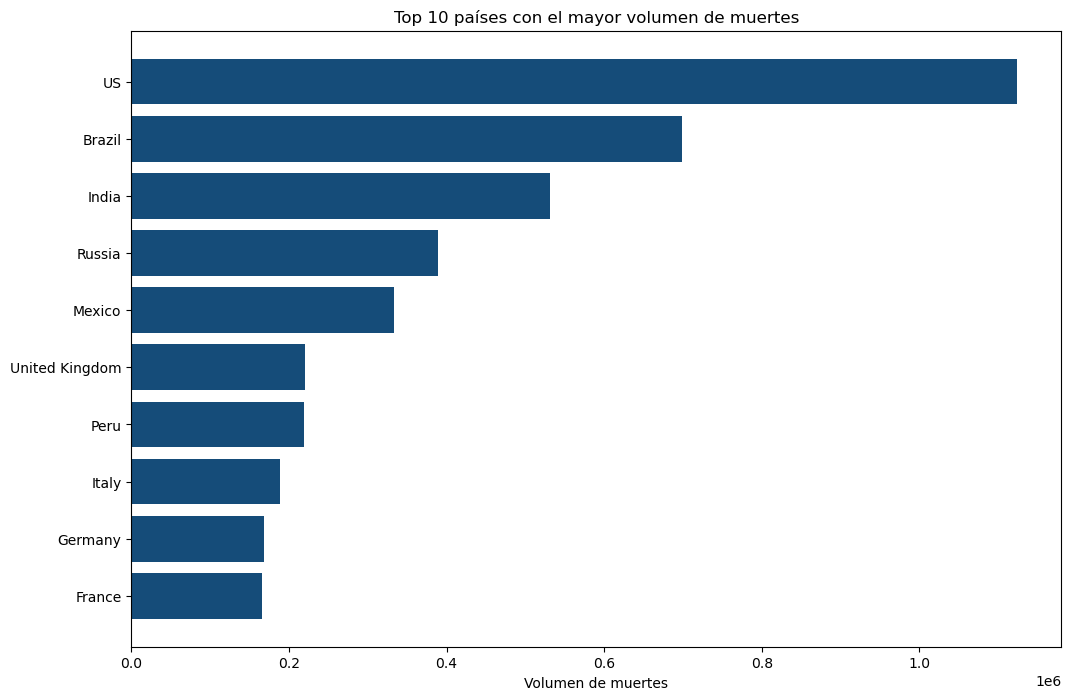

In [3]:
data_pais = df.groupby('pais').agg({'confirmados_acumulados': 'max', 'muertes_acumuladas': 'max'}).reset_index()
mas_afectados_confirmados = data_pais.sort_values(by='confirmados_acumulados', ascending=False).head(10)
mas_afectados_muertes = data_pais.sort_values(by='muertes_acumuladas', ascending=False).head(10)

plt.figure(figsize=(12, 8))
plt.barh(mas_afectados_confirmados['pais'], mas_afectados_confirmados['confirmados_acumulados'], color='#154c79')
plt.xlabel('Volumen de casos confirmados')
plt.title('Top 10 países con el mayor volumen de casos')
plt.gca().invert_yaxis()

plt.figure(figsize=(12, 8))
plt.barh(mas_afectados_muertes['pais'], mas_afectados_muertes['muertes_acumuladas'], color='#154c79')
plt.xlabel('Volumen de muertes')
plt.title('Top 10 países con el mayor volumen de muertes')
plt.gca().invert_yaxis()

plt.show()